In [2]:
#By analysing the netfilx movies data, we have conclude whether movies length are getting shorter with the passage of time.
#what king of movies are actually shorter in length (less than 60 minutes)

##Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company 
#by market capitalization, boasting over 200 million subscribers as of January 2021. Given the large number of movies and series available on the platform, 
#it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. 
#Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, 
#they have been performing some analyses, and they believe that the average duration of movies has been declining. 
#As evidence of this, they have provided us with the following information. 
#For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.
#If we're going to be working with this data, we know a good place to start would be to probably start working with pandas. 
#But first we'll need to create a DataFrame from scratch. Let's start by creating a Python object covered in Intermediate Python: a dictionary!


# Create the years and durations lists
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years":years,
             "durations":durations}

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [3]:

# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df


,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


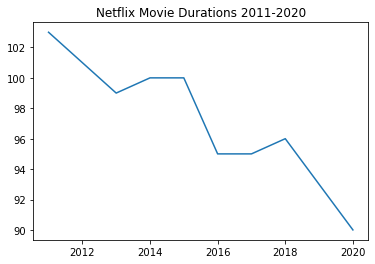

In [4]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df["years"], durations_df["durations"])

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

In [8]:
"""
Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! 
But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. 
There are a few questions about this trend that we are currently unable to answer, including:

    What does this trend look like over a longer period of time?
    Is this explainable by something like the genre of entertainment?

Upon asking our friend for the original CSV they used to perform their analyses, they gladly oblige and send it. 
We now have access to the CSV file, available at the path "datasets/netflix_data.csv". 
Let's create another DataFrame, this time with all of the data. Given the length of our friend's data, 
printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.

"""
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv(r"C:\Users\User\Desktop\Ruhul\DataCamp_Projects\Netflix\netflix_data.csv")

# Print the first eight rows of the DataFrame
netflix_df.head(8)



,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas


In [9]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df["type"] == "Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title","country","genre","release_year","duration"]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


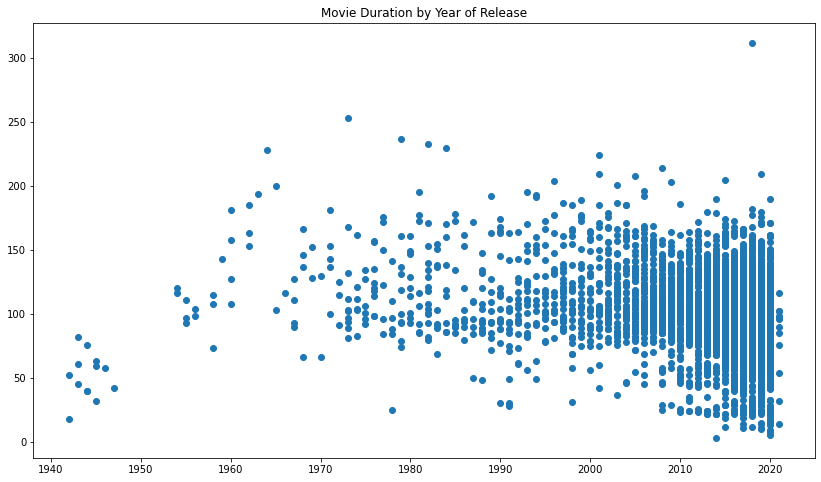

In [17]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(14,8))

# Create a scatter plot of duration versus year
plt.scatter(x=netflix_movies_col_subset["release_year"], y=netflix_movies_col_subset["duration"])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

In [19]:
"""
This is already much more informative than the simple plot we created when our friend first gave us some data. 
We can also see that, while newer movies are overrepresented on the platform, many short movies have been released 
in the past two decades.

Upon further inspection, something else is going on. Some of these films are under an hour long! 
Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. 
This might give us some insight into what is dragging down the average.

"""

# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"]<60]

# Print the first 20 rows of short_movies
short_movies.head(15)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [20]:
"""
Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as 
"Children", "Stand-Up", and "Documentaries". 
This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. 
"""

# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row["genre"] == "Children":
        colors.append("gold")
    elif row["genre"] == "Documentaries":
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
colors[:5]

['black', 'black', 'black', 'black', 'black']

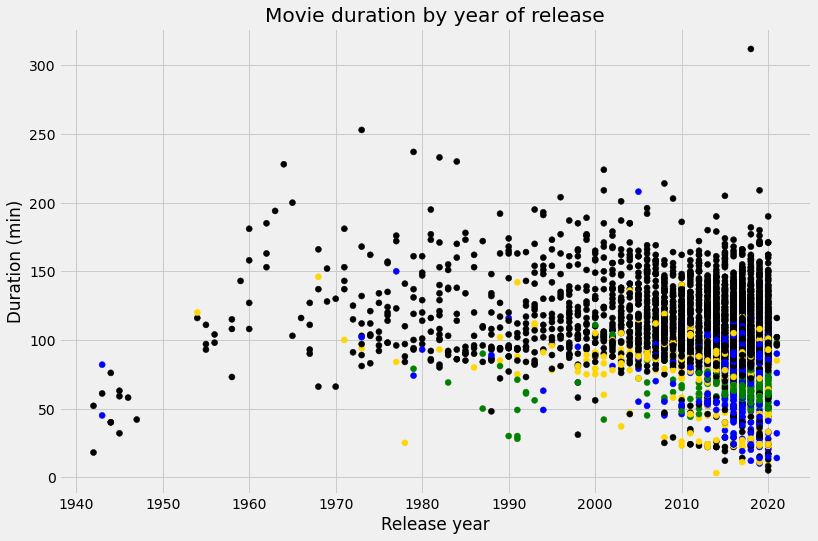

In [21]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(x=netflix_movies_col_subset.release_year, y=netflix_movies_col_subset.duration, color=colors)

# Create a title and axis labels
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie duration by year of release")
# Show the plot
plt.show()

In [ ]:
'''
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = "No"
'''
